In [2]:
from IntelArch import get_model
model = get_model()
model.eval()


Model loaded successfully on cpu


IntelModel(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.2, inplace=False)
    (10): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1))
    (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.2, inplace=False)
    (15): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
    (16): BatchNorm2d(1024, e

In [ ]:
from torchvision import transforms
import PIL

normalize_mean = [0.485, 0.456, 0.406]
normalize_std = [0.229, 0.224, 0.225]
img_arr = PIL.Image.open('galcier.jpg')
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=normalize_mean,std=normalize_std)
])

input_tensor = transform(img_arr)


In [4]:
input_tensor=input_tensor.unsqueeze(0)


In [5]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [6]:
result = model(input_tensor)


In [7]:
int_to_classes = [
"glacier",
"sea",
"street",
"forest",
"buildings",
"mountain"]

In [8]:
int_to_classes[result.argmax(dim=-1)]

'sea'

In [9]:
first_conv = model.features[0]

output = first_conv(input_tensor)  


In [10]:
first_batch = model.features[1]
first_batch_output  = first_batch(output)

In [11]:
first_batch = model.features[1]
first_batch_output  = first_batch(output)

first_relu = model.features[2]
first_relu_output  = first_relu(first_batch_output)

first_maxPool = model.features[3]
first_maxPool_output  = first_maxPool(first_relu_output)

first_dropout = model.features[4]
first_dropout_output  = first_dropout(first_maxPool_output)

In [12]:
first_maxPool = model.features[3]
first_maxPool_output  = first_maxPool(first_relu_output)

In [13]:
first_dropout = model.features[4]
first_dropout_output  = first_dropout(first_maxPool_output)

In [14]:
second_conv = model.features[5]
second_conv_output  = second_conv(first_dropout_output)

In [15]:
print(first_dropout_output.shape)
     

torch.Size([1, 64, 111, 111])


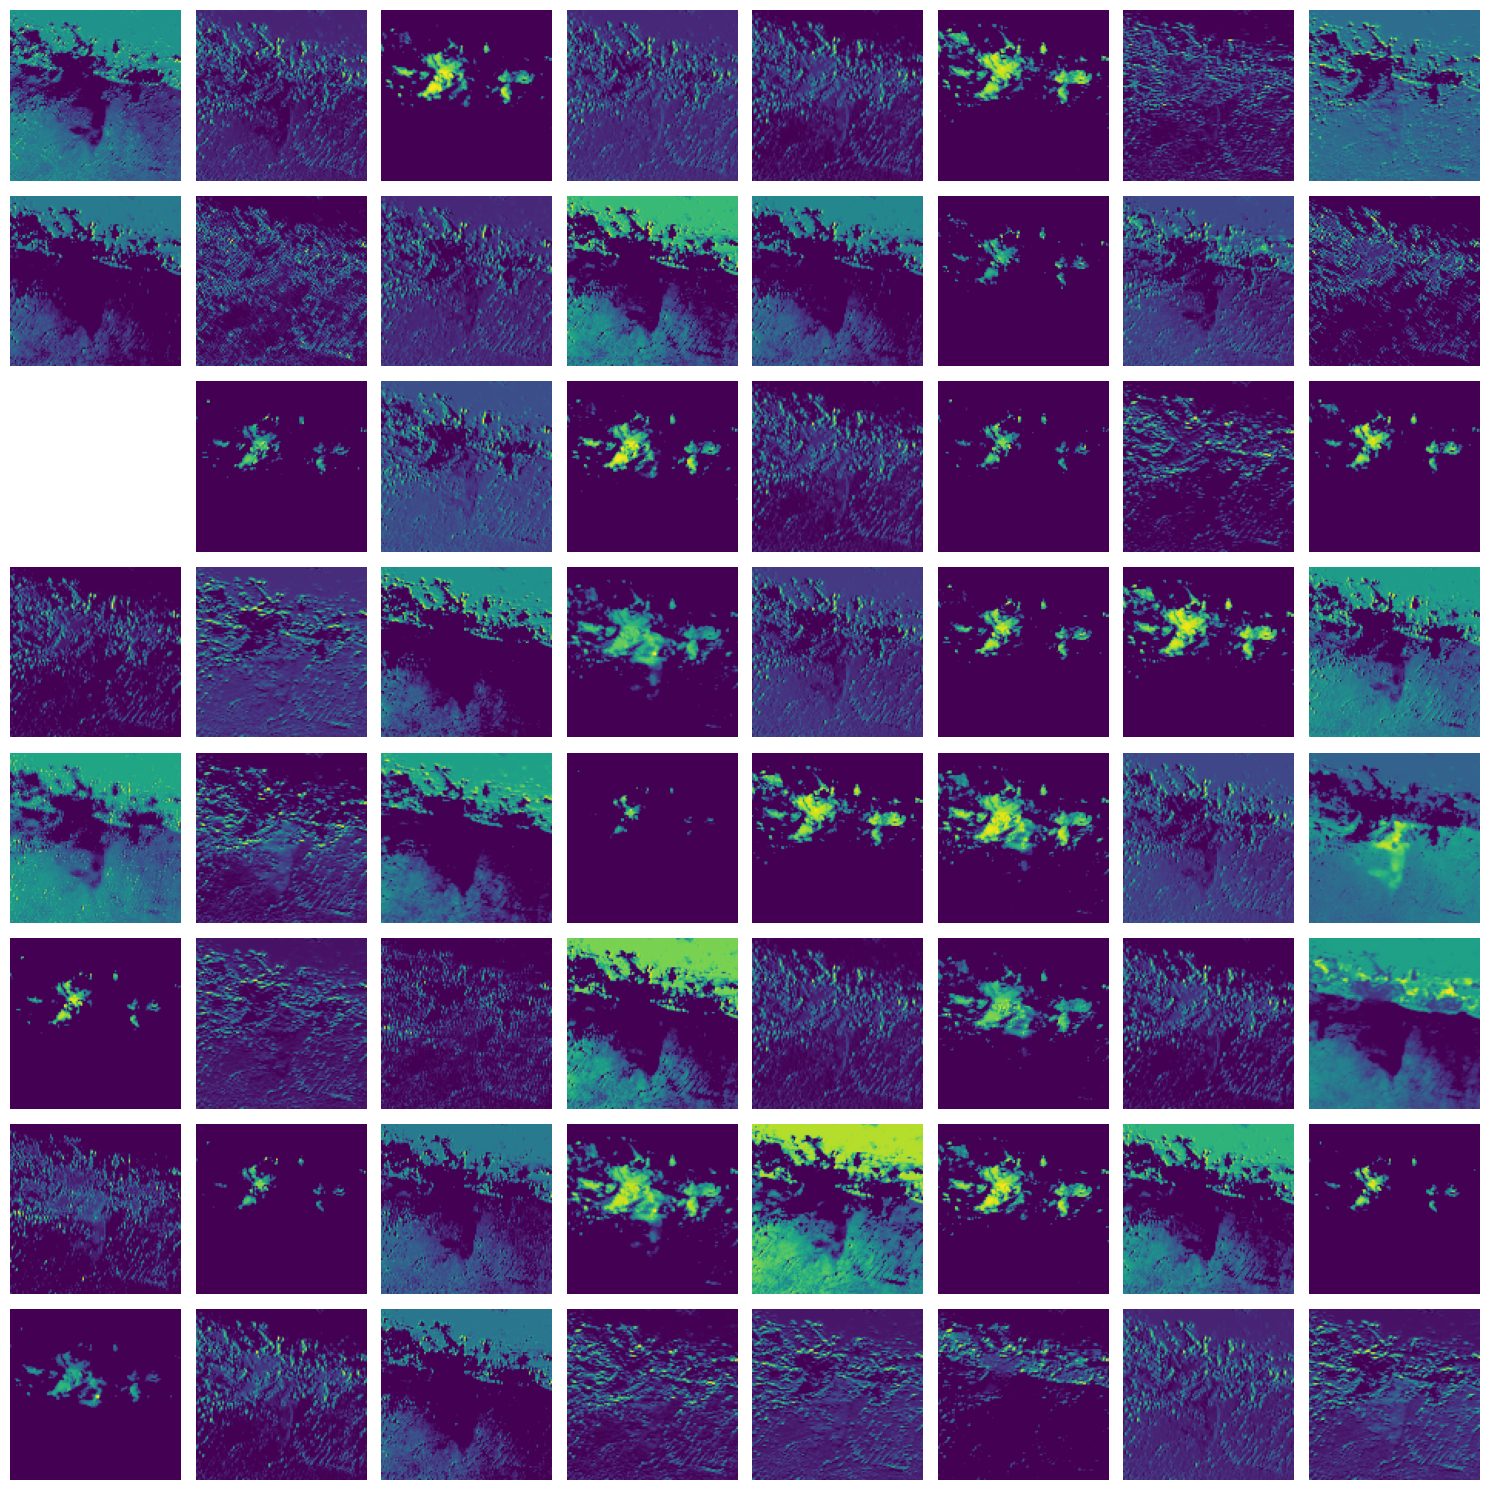

In [16]:
import matplotlib.pyplot as plt
import math

num_channels = first_dropout_output.shape[1]
cols = 8
rows = math.ceil(num_channels / cols)
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(rows, cols, i+1)
    feat = first_dropout_output[0, i].detach().cpu()
    feat = (feat - feat.min()) / (feat.max() - feat.min()) 
    plt.imshow(feat,)
    plt.axis('off')
plt.tight_layout()
plt.show()



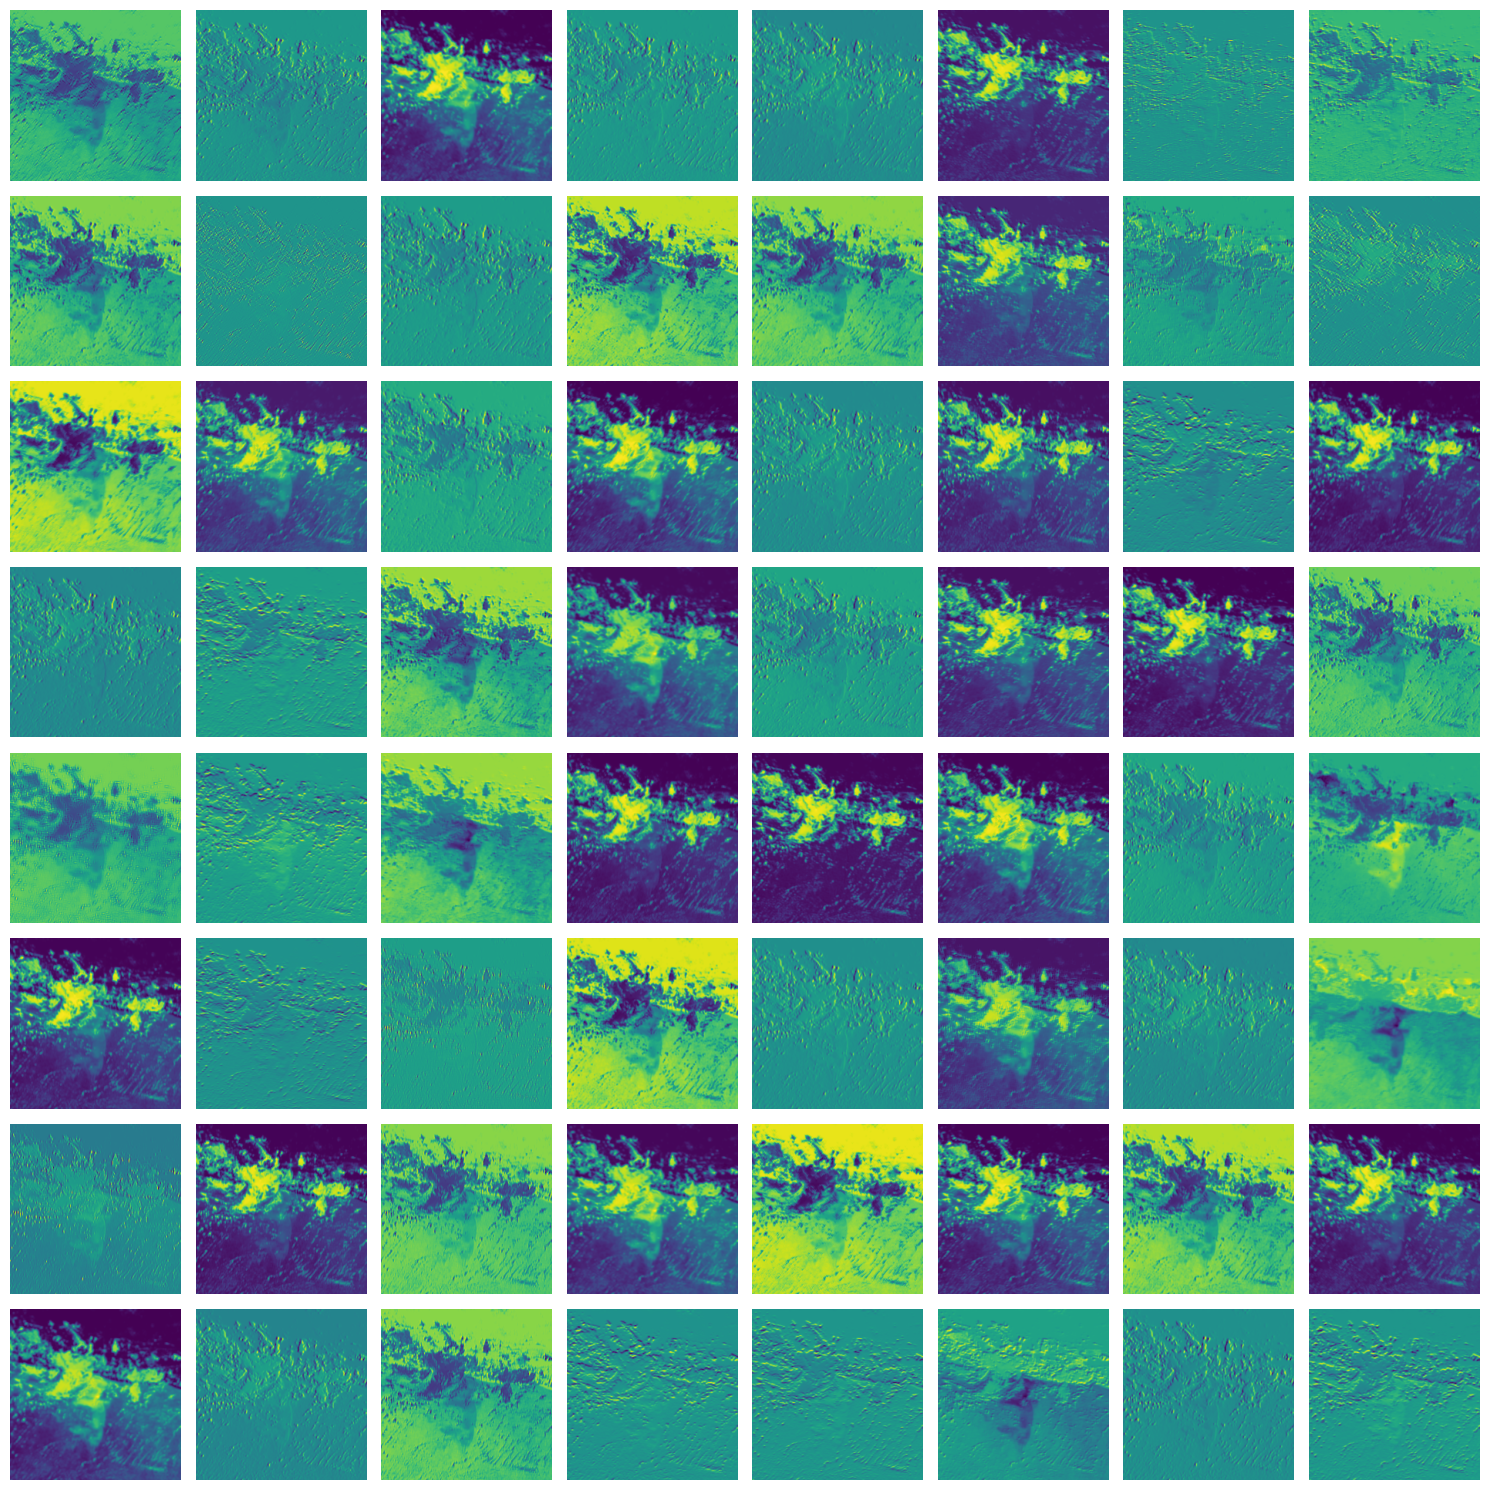

In [17]:
import matplotlib.pyplot as plt
import math

num_channels = first_relu_output.shape[1]
cols = 8
rows = math.ceil(num_channels / cols)
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(rows, cols, i+1)
    feat = output[0, i].detach().cpu()
    feat = (feat - feat.min()) / (feat.max() - feat.min()) 
    plt.imshow(feat,)
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('galcier.jpg')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
x = transform(img).unsqueeze(0) 

x_dropped = F.dropout(x, p=0.2, training=True) 

def show(img_tensor, title=""):
    img_np = img_tensor.squeeze(0).permute(1, 2, 0).numpy()
    plt.imshow(img_np)
    plt.title(title)
    plt.axis('off')
    plt.show()



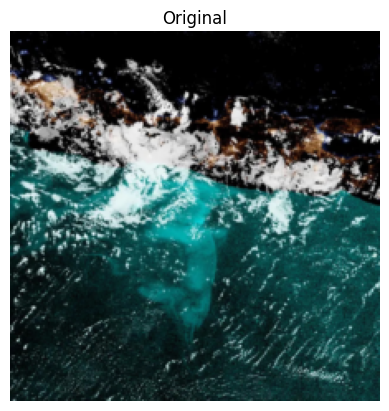

In [13]:
show(x, "Original")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2254902].


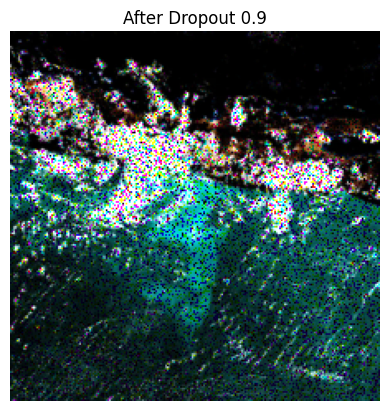

In [14]:
show(x_dropped, "After Dropout 0.9")
